<a href="https://colab.research.google.com/github/parkrye/Python/blob/main/202101_KNUBootCamp/Airplane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 설치

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install seaborn
#!pip install sklearn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# 파일 읽기

In [ ]:
#csv 파일 경로
data = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dacon/001/train.csv")

## 데이터 정보 확인

In [ ]:
#data.info()

In [ ]:
#data.describe()

In [ ]:
#data.head()

## 데이터 정리

In [ ]:
# id를 index로 사용
data.set_index('id', inplace= True)

# 연습

## 형식 1

사용 데이터프레임 : df1

상관관계 그래프 그리기를 목적으로 한 형식.

일부 문자 데이터를 숫자화한 데이터프레임을 사용.

Gender : ['Female' 'Male'] = 0, 1

Customer Type : ['disloyal Customer' 'Loyal Customer'] = 0, 1

Type of Travel : ['Business travel' 'Personal Travel'] = 0, 1

Class : ['Eco' 'Business' 'Eco Plus'] = 0, 1, 2

In [ ]:
# 데이터 값이 문자열인 컬럼과 값의 종류
for i in [0, 1, 3, 4]:
  print(data.columns[i], ':', data.iloc[:,i].unique())

Gender : [0 1]
Customer Type : [0 1]
Type of Travel : [0 1]
Class : [0 1 2]


In [ ]:
df1 = data

# 문자열 데이터를 정수형 데이터로 전환
df1.loc[df1['Gender'] == 'Female', 'Gender'] = int(0)
df1.loc[df1['Gender'] == 'Male', 'Gender'] = int(1)
df1.loc[df1['Customer Type'] == 'disloyal Customer', 'Customer Type'] = int(0)
df1.loc[df1['Customer Type'] == 'Loyal Customer', 'Customer Type'] = int(1)
df1.loc[df1['Type of Travel'] == 'Business travel', 'Type of Travel'] = int(0)
df1.loc[df1['Type of Travel'] == 'Personal Travel', 'Type of Travel'] = int(1)
df1.loc[df1['Class'] == 'Eco', 'Class'] = int(0)
df1.loc[df1['Class'] == 'Business', 'Class'] = int(1)
df1.loc[df1['Class'] == 'Eco Plus', 'Class'] = int(2)
df1 = df1.astype(int)

df1.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
id,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,22,0,0,1599,3,0,3,3,4,3,4,4,5,4,4,4,5,4,0,0,0
2,0,1,37,0,1,2810,2,4,4,4,1,4,3,5,5,4,2,1,5,2,18,18,0
3,1,1,46,0,1,2622,1,1,1,1,4,5,5,4,4,4,4,5,4,3,0,0,1
4,0,0,24,0,0,2348,3,3,3,3,3,3,3,3,2,4,5,3,4,3,10,2,0
5,0,1,58,0,1,105,3,3,3,3,4,4,5,4,4,4,4,4,4,5,0,0,1


정규화 과정 필요

상관관계 그래프

※ 모든 데이터를 비교하기 때문에 작동 시간이 김

※ 유용한 데이터로는 보이지 않음

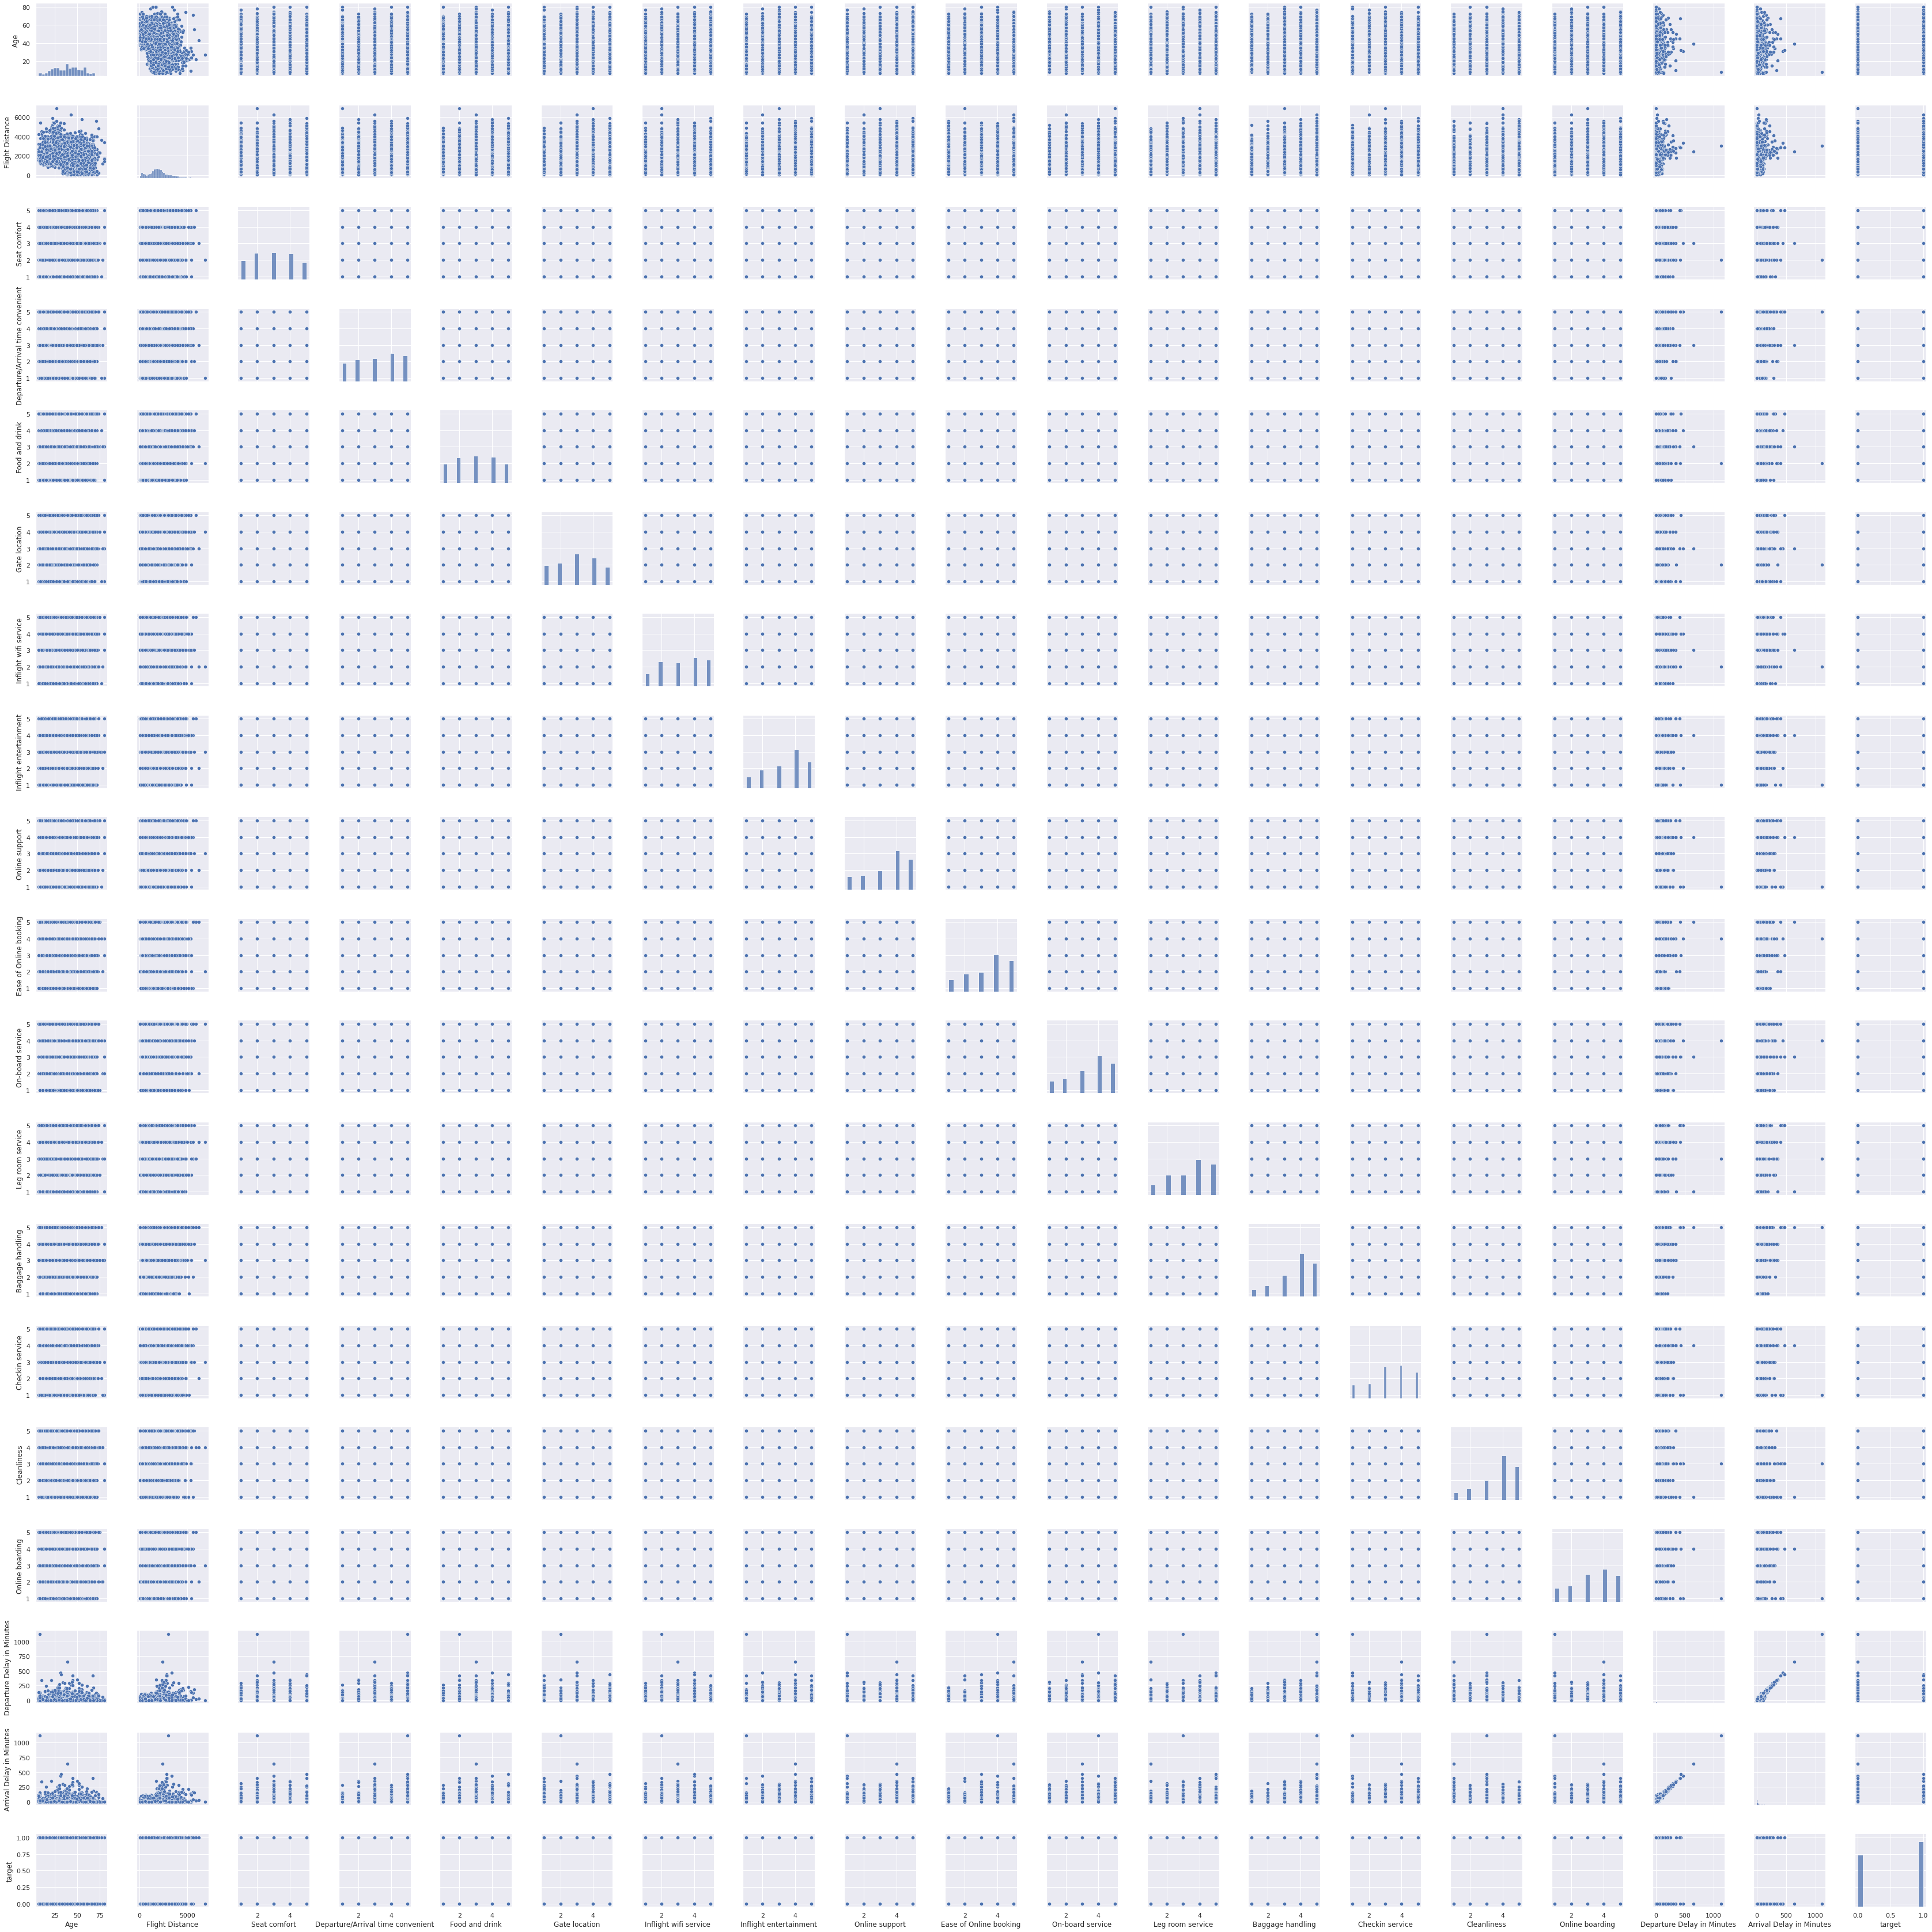

In [ ]:
sns.pairplot(df10)

## 형식 2

사용 데이터프레임 : df2

target 비율 그리기 목적으로 한 형식.

x축 = 특정 컬럼, y축 = target의 비율.

In [ ]:
df2 = df10
df2.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
id,,,,,,,,,,,,,,,,,,,,,,,
1,Female,disloyal Customer,22,Business travel,Eco,1599,3.0,4.0,3.0,3,4.0,3.0,4,4.0,5,4.0,4,4,5,4.0,0,0.0,0
2,Female,Loyal Customer,37,Business travel,Business,2810,2.0,4.0,4.0,4,1.0,4.0,3,5.0,5,4.0,2,1,5,2.0,18,18.0,0
3,Male,Loyal Customer,46,Business travel,Business,2622,1.0,1.0,1.0,1,4.0,5.0,5,4.0,4,4.0,4,5,4,3.0,0,0.0,1
4,Female,disloyal Customer,24,Business travel,Eco,2348,3.0,3.0,3.0,3,3.0,3.0,3,3.0,2,4.0,5,3,4,3.0,10,2.0,0
5,Female,Loyal Customer,58,Business travel,Business,105,3.0,3.0,3.0,3,4.0,4.0,5,4.0,4,4.0,4,4,4,5.0,0,0.0,1


In [ ]:
def get_prop(name): # 특정 컬럼을 인수로 받아 해당 컬럼-타겟의 비율을 반환하는 함수
  division = df2[name].unique()  # 인수로 받은 칼럼의 종류
  total = [] # target이 1인 비율

  for i in range(len(division)):
    total.append( (df2.loc[df2[name] == division[i], 'target'].sum()) / (df2.loc[df2[name] == division[i], 'target'].count()) )
    # 타겟의 총합(타겟은 0, 1이므로 타겟이 1인 수와 같음) / 타겟의 개수
  
  return total

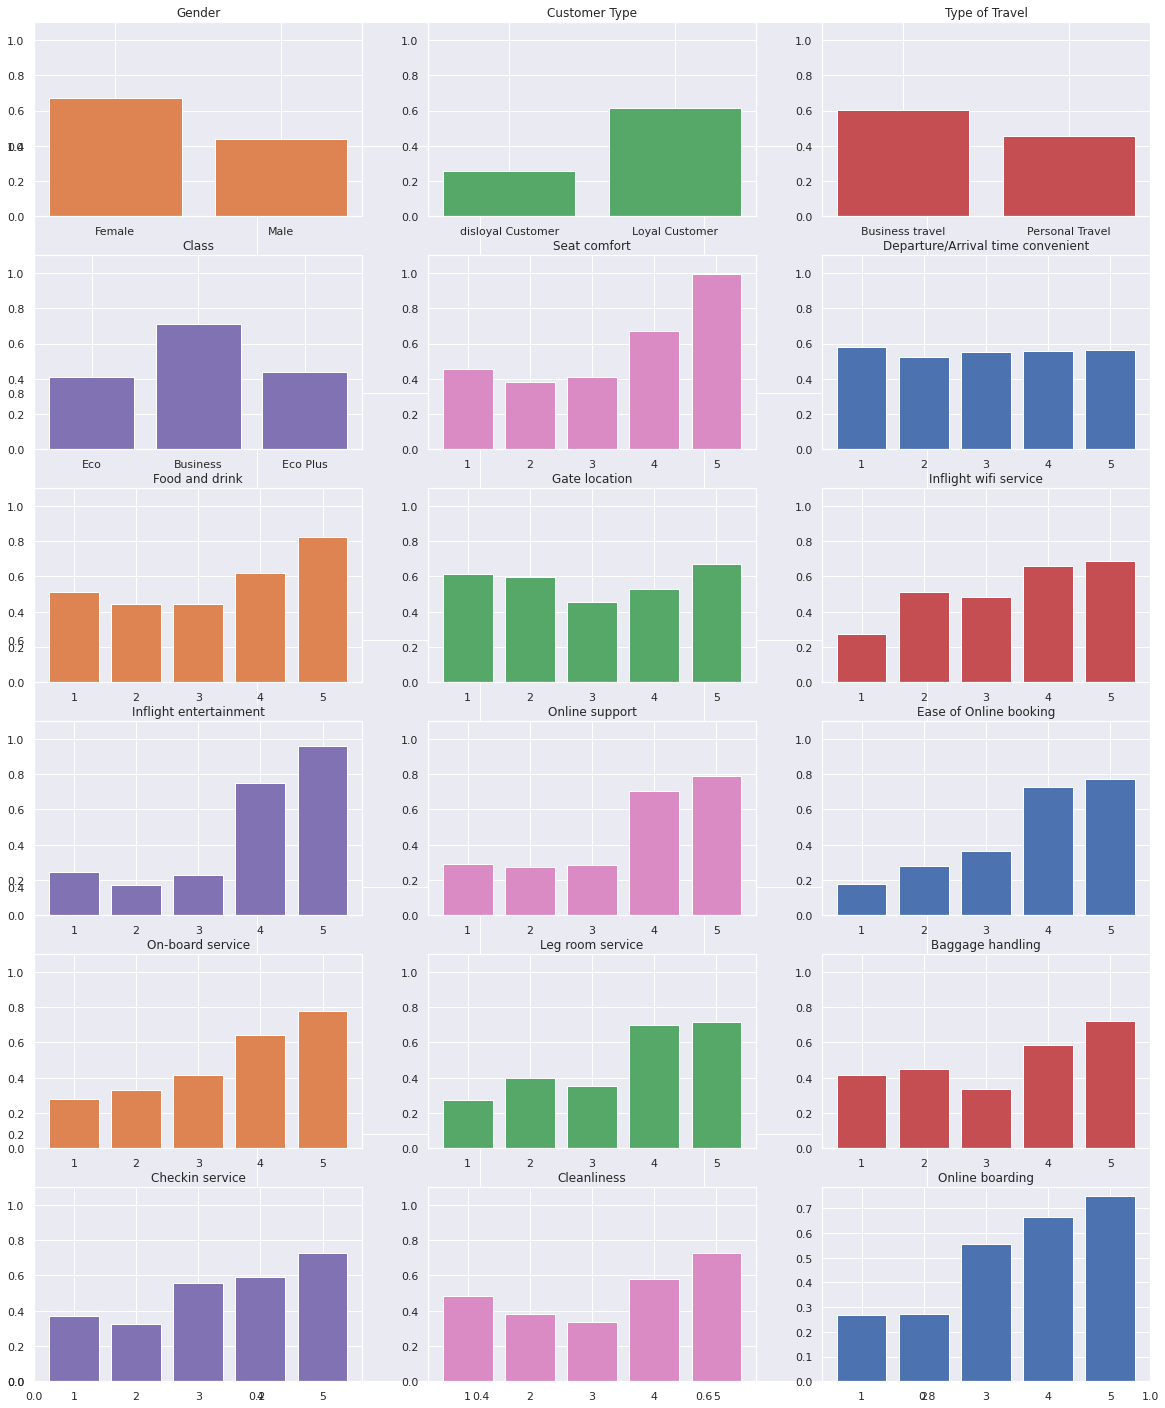

In [ ]:
figure = plt.figure(figsize = (20, 25))
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C6']
count = 1
# Age, Flight Distance, Departure Delay in Minutes, Arrival Delay in Minutes 은 종류가 많아 제외함
for i in [0, 1, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]:
  tmp = get_prop(df2.columns[i])
  plt.ylim(0, 1.1)
  ax = figure.add_subplot(6, 3, count)
  ax.set_title(df2.columns[i])
  ax.bar(df2.iloc[:, i].unique(), tmp, color = colors[count%6])
  count += 1
plt.show()

## 형식 3

사용 데이터프레임 : df3

유사도 검사를 목적으로 한 형식.

일부 문자 데이터를 숫자화한 데이터프레임.

In [ ]:
df3 = data

In [ ]:
# 문자열 데이터의 정수화
df3.loc[df3['Gender'] == 'Female', 'Gender'] = int(0)
df3.loc[df3['Gender'] == 'Male', 'Gender'] = int(1)
df3.loc[df3['Customer Type'] == 'disloyal Customer', 'Customer Type'] = int(0)
df3.loc[df3['Customer Type'] == 'Loyal Customer', 'Customer Type'] = int(1)
df3.loc[df3['Type of Travel'] == 'Business travel', 'Type of Travel'] = int(0)
df3.loc[df3['Type of Travel'] == 'Personal Travel', 'Type of Travel'] = int(1)
df3.loc[df3['Class'] == 'Eco', 'Class'] = int(0)
df3.loc[df3['Class'] == 'Business', 'Class'] = int(1)
df3.loc[df3['Class'] == 'Eco Plus', 'Class'] = int(2)
df3 = df3.astype(int)

In [ ]:
print(df3.columns[5], '최소값 :', df3.iloc[5].min(), '평균값 :', df3.iloc[5].mean(), '중앙값 :',df3.iloc[:, 5].sort_values()[1500], '최대값 :', df3.iloc[5].max())
print(df3.columns[20], '최소값 :', df3.iloc[20].min(), '평균값 :', df3.iloc[20].mean(), '중앙값 :',df3.iloc[:, 20].sort_values()[1500], '최대값 :', df3.iloc[20].max())
print(df3.columns[21], '최소값 :', df3.iloc[21].min(), '평균값 :', df3.iloc[21].mean(), '중앙값 :',df3.iloc[:, 21].sort_values()[1500], '최대값 :', df3.iloc[21].max())

Flight Distance 최소값 : 0 평균값 : 81.82608695652173 중앙값 : 1600 최대값 : 1780
Departure Delay in Minutes 최소값 : 0 평균값 : 91.04347826086956 중앙값 : 3 최대값 : 2029
Arrival Delay in Minutes 최소값 : 0 평균값 : 88.69565217391305 중앙값 : 0 최대값 : 1912


In [ ]:
from numpy.core.fromnumeric import std
count = 0
sum = 0
for i in [5, 20, 21]:
  mid = df3.iloc[:, i].sort_values()[int(len(df3.iloc[:, i])/2)]
  for j in range(3000):
    if abs((df3.iloc[j, i] - df3.iloc[:, i].mean()) / df3.iloc[:, i].std()) > 2:
      df3.iloc[j, i] = mid
    df3.iloc[j, i] = ((df3.iloc[j, i] - df3.iloc[:, i].min()) / (df3.iloc[:, i].max() - df3.iloc[:, i].min()))
    df3.iloc[j, i] = round(df3.iloc[j, i] * 5, 3)
    df3.iloc[j, i] = int(df3.iloc[j, i] * 100)
df3 = df3.astype(int)

In [ ]:
for i in range(6, 20):
  if i != 5 or i != 20 or i != 21:
    for j in range(3000):
      if df3.iloc[j][i] == 0:
        df3.iloc[j, i] = int(round(df3.iloc[:, i].mean()))

In [ ]:
df3.head(20)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
id,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,22,0,0,113,3,3,3,3,4,3,4,4,5,4,4,4,5,4,0,0,0
2,0,1,37,0,1,201,2,4,4,4,1,4,3,5,5,4,2,1,5,2,8,8,0
3,1,1,46,0,1,188,1,1,1,1,4,5,5,4,4,4,4,5,4,3,0,0,1
4,0,0,24,0,0,168,3,3,3,3,3,3,3,3,2,4,5,3,4,3,4,0,0
5,0,1,58,0,1,3,3,3,3,3,4,4,5,4,4,4,4,4,4,5,0,0,1
6,0,1,42,0,1,129,4,4,4,4,3,3,4,5,5,4,5,3,5,4,0,0,1
7,0,0,20,0,0,216,3,3,3,4,5,3,5,5,1,5,3,1,4,5,5,15,0
8,1,1,38,0,0,100,4,3,3,3,4,4,4,4,1,2,2,1,5,4,0,0,1
9,0,1,51,0,1,170,2,2,2,2,3,4,5,3,3,3,3,3,3,3,0,0,1


In [ ]:
# 모든 데이터의 유사도(수)
df3.corr().round(3)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
Gender,1.000,0.021,-0.003,0.016,-0.032,0.136,-0.101,0.052,-0.092,-0.017,-0.037,-0.142,-0.124,-0.117,-0.111,-0.106,-0.040,-0.030,-0.031,-0.077,-0.020,-0.017,-0.234
Customer Type,0.021,1.000,0.269,0.304,0.110,-0.126,0.051,0.120,0.062,0.005,0.065,0.214,0.171,0.129,0.065,0.084,-0.020,0.027,-0.015,0.088,-0.035,-0.014,0.271
Age,-0.003,0.269,1.000,-0.053,0.120,-0.230,-0.006,-0.008,-0.000,-0.002,0.022,0.090,0.120,0.080,0.044,0.097,-0.018,0.039,-0.023,0.042,-0.022,-0.007,0.107
Type of Travel,0.016,0.304,-0.053,1.000,-0.370,-0.043,0.011,0.187,-0.016,-0.028,-0.021,-0.077,-0.046,-0.041,0.023,-0.012,0.016,0.055,0.047,-0.022,-0.000,-0.018,-0.134
Class,-0.032,0.110,0.120,-0.370,1.000,-0.014,-0.018,-0.058,0.015,0.014,0.033,0.145,0.112,0.063,0.045,0.064,0.045,0.052,0.039,0.048,-0.013,-0.021,0.185
Flight Distance,0.136,-0.126,-0.230,-0.043,-0.014,1.000,-0.051,0.007,-0.023,0.004,-0.021,-0.075,-0.057,-0.071,-0.042,-0.050,-0.001,-0.023,-0.012,-0.026,0.073,0.035,-0.125
Seat comfort,-0.101,0.051,-0.006,0.011,-0.018,-0.051,1.000,0.481,0.686,0.445,0.157,0.438,0.147,0.223,0.133,0.132,0.103,0.049,0.090,0.164,-0.050,-0.030,0.367
Departure/Arrival time convenient,0.052,0.120,-0.008,0.187,-0.058,0.007,0.481,1.000,0.587,0.579,-0.018,0.084,-0.011,-0.022,0.089,-0.009,0.062,0.065,0.062,0.005,0.003,-0.004,-0.005
Food and drink,-0.092,0.062,-0.000,-0.016,0.015,-0.023,0.686,0.587,1.000,0.572,0.024,0.332,0.039,0.061,0.075,0.062,0.022,0.012,0.035,0.050,-0.010,0.002,0.215
Gate location,-0.017,0.005,-0.002,-0.028,0.014,0.004,0.445,0.579,0.572,1.000,0.011,0.030,0.031,0.027,0.008,-0.023,-0.002,-0.041,-0.005,0.039,-0.001,0.015,0.003


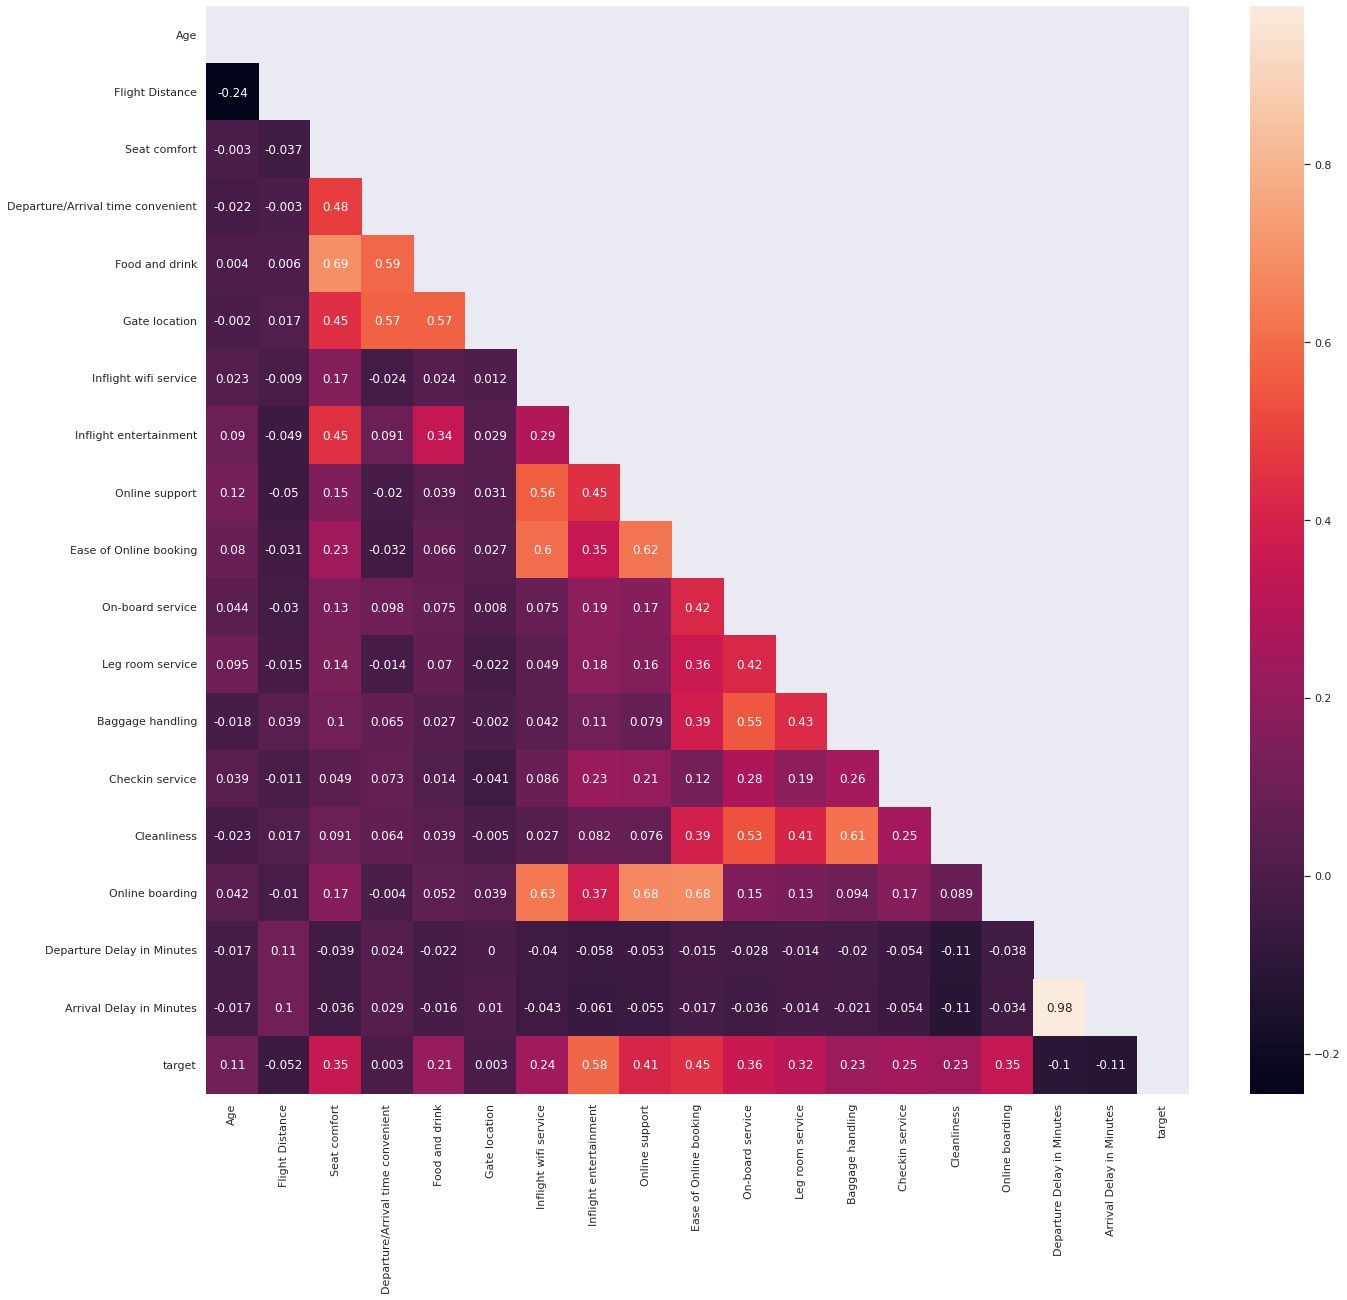

In [ ]:
# 모든 데이터의 유사도(히트맵)

sns.set(rc={'figure.figsize':(22,20)})
correlation_matrix = df10.corr().round(3)
upp_mat = np.triu(df10.corr())
sns.heatmap(correlation_matrix, annot = True, mask = upp_mat)

In [ ]:
# 모든 데이터의 target에 대한 유사도(수)
df3.corr().iloc[-1]

Gender                              -0.233619
Customer Type                        0.271471
Age                                  0.107226
Type of Travel                      -0.133565
Class                                0.184801
Flight Distance                     -0.124616
Seat comfort                         0.367274
Departure/Arrival time convenient   -0.005469
Food and drink                       0.215204
Gate location                        0.003213
Inflight wifi service                0.241221
Inflight entertainment               0.590718
Online support                       0.411944
Ease of Online booking               0.447450
On-board service                     0.359699
Leg room service                     0.319781
Baggage handling                     0.232302
Checkin service                      0.248975
Cleanliness                          0.234848
Online boarding                      0.350895
Departure Delay in Minutes          -0.067400
Arrival Delay in Minutes          

In [ ]:
# 위 유사도를 절대값이 높은 순서대로 정렬함
df3.corr().iloc[-1].abs().sort_values(ascending = False)

target                               1.000000
Inflight entertainment               0.590718
Ease of Online booking               0.447450
Online support                       0.411944
Seat comfort                         0.367274
On-board service                     0.359699
Online boarding                      0.350895
Leg room service                     0.319781
Customer Type                        0.271471
Checkin service                      0.248975
Inflight wifi service                0.241221
Cleanliness                          0.234848
Gender                               0.233619
Baggage handling                     0.232302
Food and drink                       0.215204
Class                                0.184801
Type of Travel                       0.133565
Flight Distance                      0.124616
Age                                  0.107226
Arrival Delay in Minutes             0.077624
Departure Delay in Minutes           0.067400
Departure/Arrival time convenient 

In [ ]:
train = []
for i in range(1, 23):
  train.append(df3.corr().iloc[-1].abs().sort_values(ascending = False).index[1:i+1])

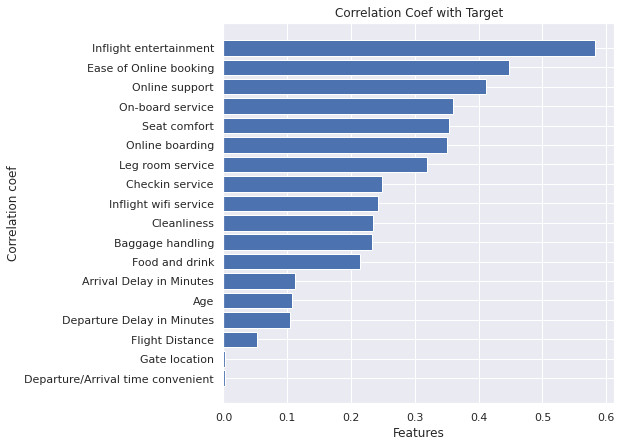

In [ ]:
# 위의 정렬된 표를 바 플롯으로 그림
c = df3.corr().iloc[-1]
c = np.abs(c)
c.sort_values(ascending = True, inplace = True)
c = c[:-1]

plt.figure(figsize=(7,7))
plt.barh(c.index, c.values)

plt.title('Correlation Coef with Target')
plt.xlabel('Features')
plt.ylabel('Correlation coef')
plt.show()

In [ ]:
tdf = pd.read_csv("/content/train.csv")

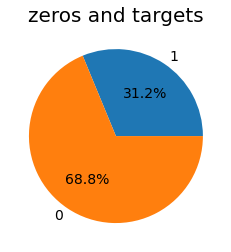

In [ ]:
total = 0
target_1 = 0
for i in range(len(tdf)):
  zero = False
  for j in range(7, 21):
    if tdf.iloc[i][j] == 0:
      total += 1
      zero = True
      j = 21
  if zero == True:
    if tdf.iloc[i][-1] == 1:
      target_1 += 1

ratio = round((target_1 / total) * 100, 2)

plt.pie([ratio, (100-ratio)], labels = ['1', '0'], autopct='%.1f%%', textprops={'fontsize': 14})
plt.title('zeros and targets', size = 20)

plt.show()

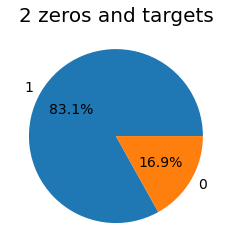

In [ ]:
total2 = 0
target_12 = 0
score = 0
for i in range(len(tdf)):
  zero2 = False
  count = 0
  for j in range(7, 21):
    if tdf.iloc[i][j] == 0:
      total2 += 1
      count += 1
      if count == 2:
        zero2 = True
  if zero2 == True:
    score += 1
    if tdf.iloc[i][-1] == 1:
      target_12 += 1

ratio2 = round((target_12 / score) * 100, 2)

plt.pie([ratio2, (100-ratio2)], labels = ['1', '0'], autopct='%.1f%%', textprops={'fontsize': 14})
plt.title('2 zeros and targets', size = 20)

plt.show()

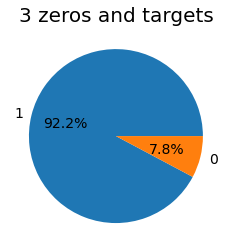

In [ ]:
total3 = 0
target_13 = 0
score = 0
for i in range(len(tdf)):
  zero3 = False
  count = 0
  for j in range(7, 21):
    if tdf.iloc[i][j] == 0:
      total3 += 1
      count += 1
      if count == 3:
        zero3 = True
  if zero3 == True:
    score += 1
    if tdf.iloc[i][-1] == 1:
      target_13 += 1

ratio3 = round((target_13 / score) * 100, 2)

plt.pie([ratio3, (100-ratio3)], labels = ['1', '0'], autopct='%.1f%%', textprops={'fontsize': 14})
plt.title('3 zeros and targets', size = 20)

plt.show()

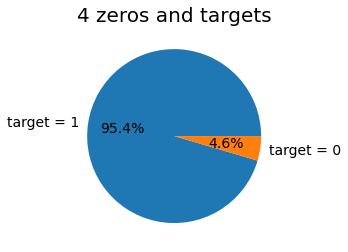

In [ ]:
target_1 = 0
total = 0

for i in range(len(tdf)):
  zero = False
  count = 0
  for j in range(7, 21):
    if tdf.iloc[i][j] == 0:
      count += 1
      if count == 4:
        zero = True
  if zero == True:
    total += 1
    if tdf.iloc[i][-1] == 1:
      target_1 += 1

ratio = round((target_1 / score) * 100, 2)

plt.pie([ratio, (100-ratio)], labels = ['target = 1', 'target = 0'], autopct='%.1f%%',
        textprops={'fontsize': 14})
plt.title('4 zeros and targets', size = 20)

plt.show()

In [ ]:
tdf.head(1)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,1,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,3,4,3,4,4,5,4,4,4,5,4,0,0.0,0


In [ ]:
tdf.iloc[:, -3:-1].corr()

,Departure Delay in Minutes,Arrival Delay in Minutes
Departure Delay in Minutes,1.000000,0.976873
Arrival Delay in Minutes,0.976873,1.000000


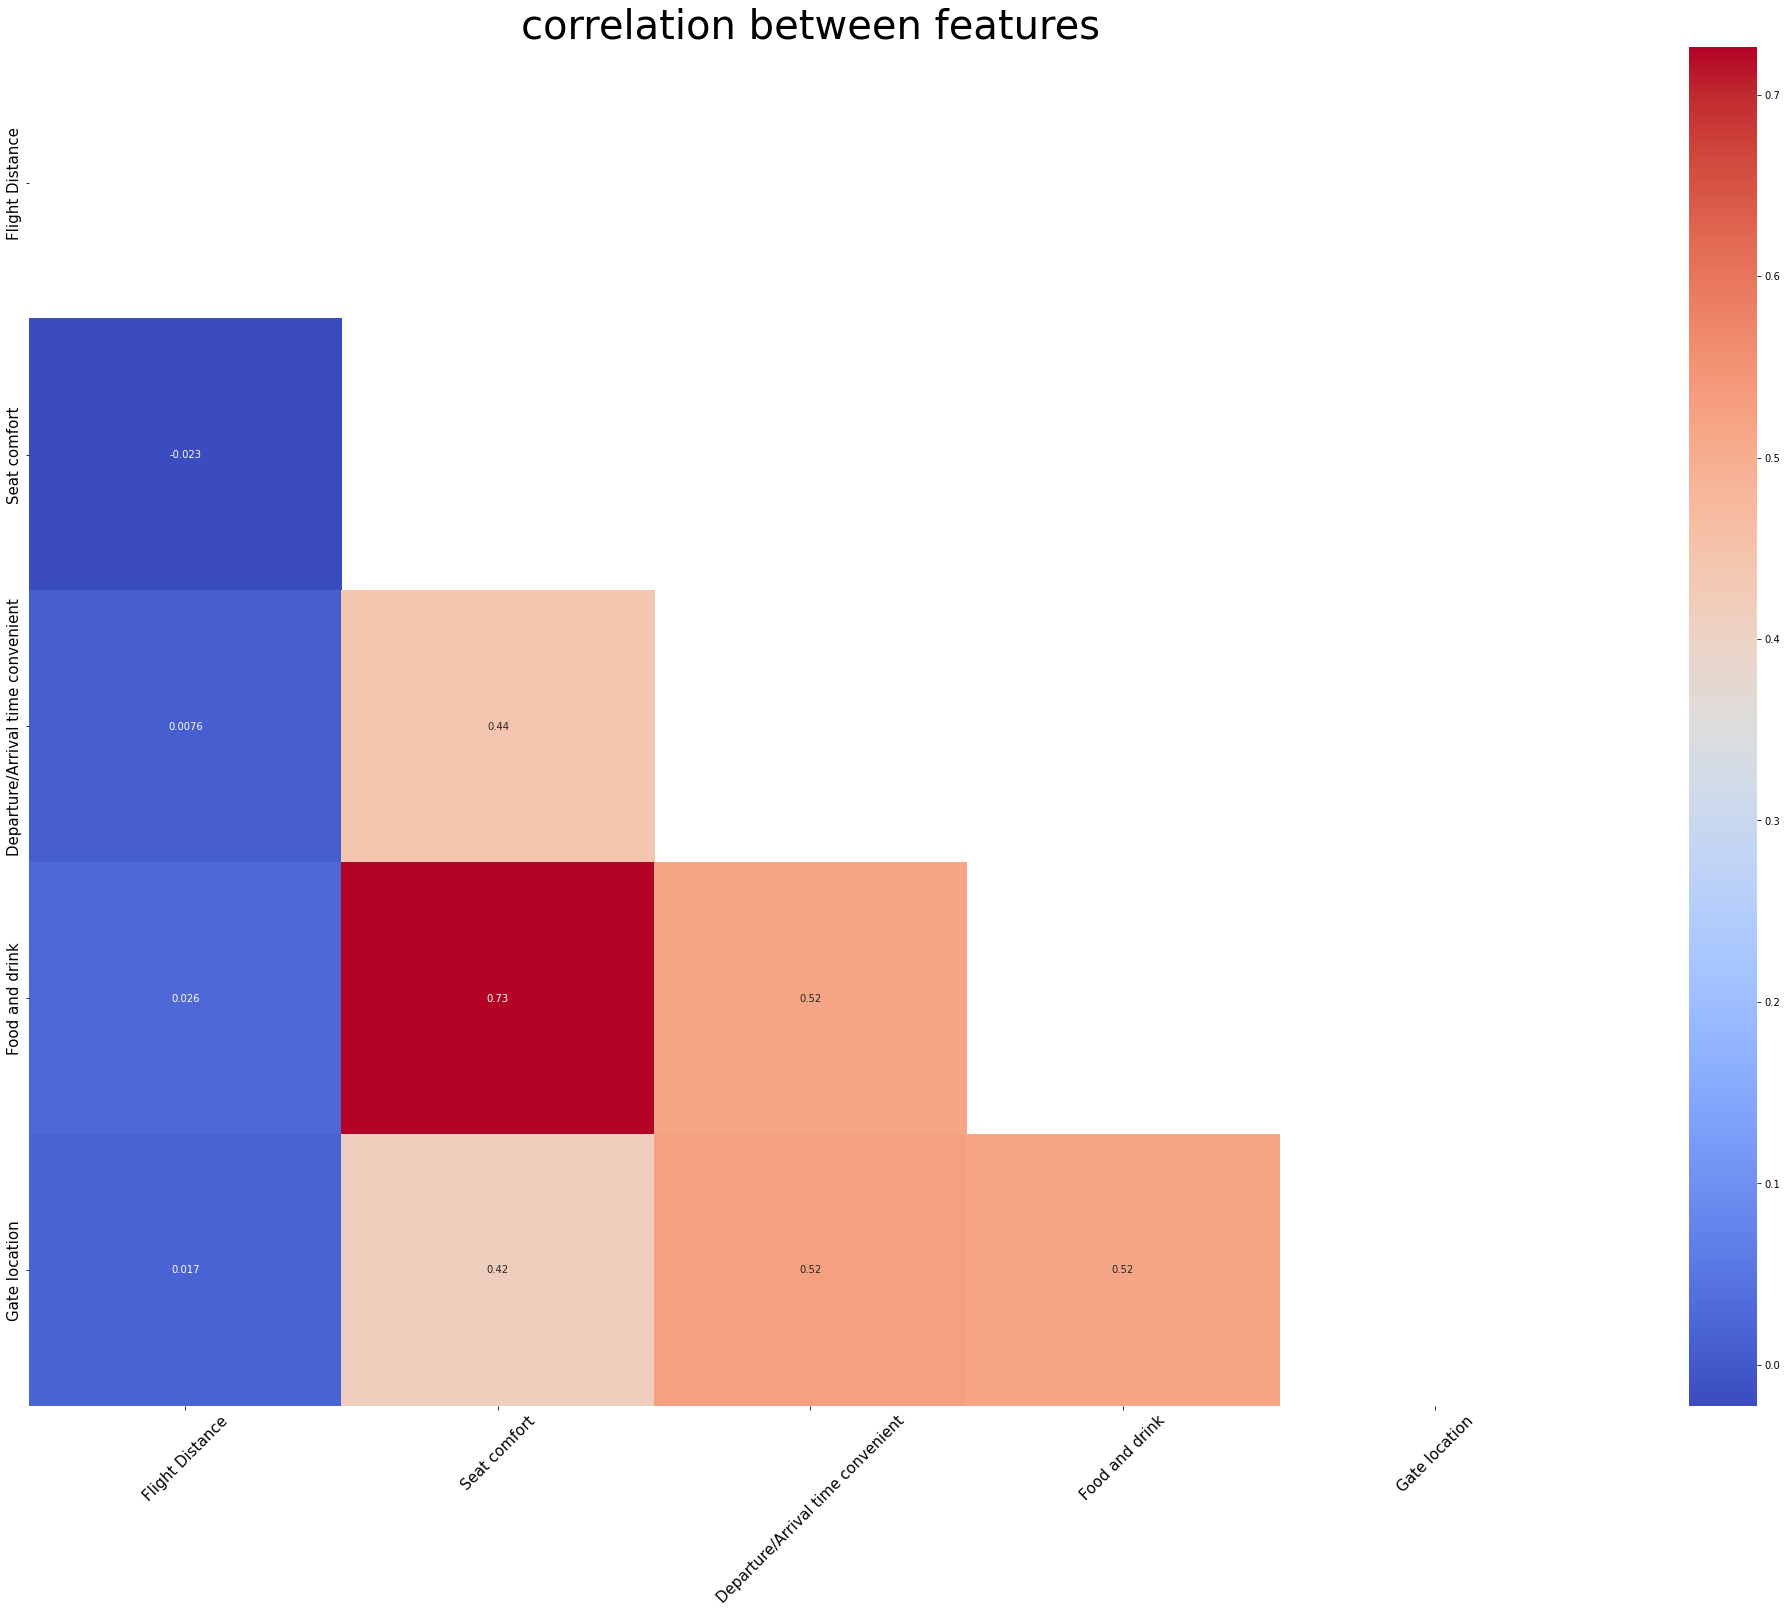

In [ ]:
plt.figure(figsize=(35,25))
heat_table = tdf.iloc[:, 6:11].corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()

## 형식 4

사용 데이터프레임 : train_data, test_data

오렌지 사용을 위한 훈련/시험 데이터 처리

## 형식 5

0 값을 Hot deck 방식으로 KNN을 이용하여 채움

In [ ]:
df10 = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dacon/001/train.csv")
df10.set_index('id', inplace= True)
df11 = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dacon/001/test.csv")
df11.set_index('id', inplace= True)

In [ ]:
# 1단계, 종속 삭제
df10.drop('Food and drink', axis = 1, inplace = True)
df10.drop('Online support', axis = 1, inplace = True)
df10.drop('Ease of Online booking', axis = 1, inplace = True)
df10.drop('Departure Delay in Minutes', axis = 1, inplace = True)

df11.drop('Food and drink', axis = 1, inplace = True)
df11.drop('Online support', axis = 1, inplace = True)
df11.drop('Ease of Online booking', axis = 1, inplace = True)
df11.drop('Departure Delay in Minutes', axis = 1, inplace = True)

df10.to_csv('edited_train_1.csv', index = True)
df11.to_csv('edited_test_1.csv', index = True)

In [ ]:
# 2단계, Hot Deck
rep_df0 = df10.iloc[:, 6:17].replace(0, np.NaN)
rep_df1 = df11.iloc[:, 6:17].replace(0, np.NaN)

In [ ]:
from sklearn.impute import KNNImputer

for i in range(len(rep_df0.columns)):
  imputer = KNNImputer(n_neighbors=1, weights="uniform")
  line = imputer.fit_transform(rep_df0)
for i in range(len(rep_df1.columns)):
  imputer1 = KNNImputer(n_neighbors=1, weights="uniform")
  line1 = imputer.fit_transform(rep_df1)

In [ ]:
rep_df0[:][:] = line
df10.iloc[:, 6:17] = rep_df0[:][:]

rep_df1[:][:] = line1
df11.iloc[:, 6:17] = rep_df1[:][:]

df10.to_csv('edited_train_2.csv', index = True)
df11.to_csv('edited_test_2.csv', index = True)

In [ ]:
# 상관계수 출력을 위해 데이터를 숫자값으로
df12 = df10

df12.loc[df12['Gender'] == 'Female', 'Gender'] = int(0)
df12.loc[df12['Gender'] == 'Male', 'Gender'] = int(1)
df12.loc[df12['Customer Type'] == 'disloyal Customer', 'Customer Type'] = int(0)
df12.loc[df12['Customer Type'] == 'Loyal Customer', 'Customer Type'] = int(1)
df12.loc[df12['Type of Travel'] == 'Business travel', 'Type of Travel'] = int(0)
df12.loc[df12['Type of Travel'] == 'Personal Travel', 'Type of Travel'] = int(1)
df12.loc[df12['Class'] == 'Eco', 'Class'] = int(0)
df12.loc[df12['Class'] == 'Business', 'Class'] = int(1)
df12.loc[df12['Class'] == 'Eco Plus', 'Class'] = int(2)
df12 = df12.astype(int)
df12.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Gate location,Inflight wifi service,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Arrival Delay in Minutes,target
id,,,,,,,,,,,,,,,,,,,
1,0,0,22,0,0,1599,3,4,3,4,3,5,4,4,4,5,4,0,0
2,0,1,37,0,1,2810,2,4,4,1,4,5,4,2,1,5,2,18,0
3,1,1,46,0,1,2622,1,1,1,4,5,4,4,4,5,4,3,0,1
4,0,0,24,0,0,2348,3,3,3,3,3,2,4,5,3,4,3,2,0
5,0,1,58,0,1,105,3,3,3,4,4,4,4,4,4,4,5,0,1


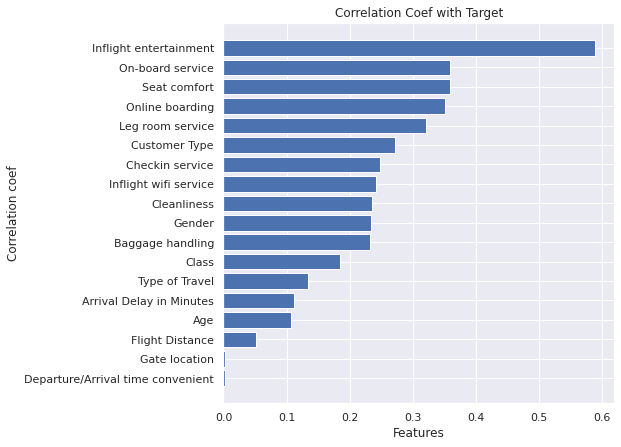

In [ ]:
c = df12.corr()['target']
c = np.abs(c)
c.sort_values(ascending = True, inplace = True)
c = c[:-1]

plt.figure(figsize=(7,7))
plt.barh(c.index, c.values)

plt.title('Correlation Coef with Target')
plt.xlabel('Features')
plt.ylabel('Correlation coef')
plt.show()

In [ ]:
df10.drop('Arrival Delay in Minutes', axis = 1, inplace = True)
df10.drop('Age', axis = 1, inplace = True)
df10.drop('Flight Distance', axis = 1, inplace = True)
df10.drop('Gate location', axis = 1, inplace = True)
df10.drop('Departure/Arrival time convenient', axis = 1, inplace = True)

df11.drop('Arrival Delay in Minutes', axis = 1, inplace = True)
df11.drop('Age', axis = 1, inplace = True)
df11.drop('Flight Distance', axis = 1, inplace = True)
df11.drop('Gate location', axis = 1, inplace = True)
df11.drop('Departure/Arrival time convenient', axis = 1, inplace = True)

df10.to_csv('edited_train_3.csv', index = True)
df11.to_csv('edited_test_3.csv', index = True)

## 파일 정리 및 입출력

In [ ]:
from numpy.core.fromnumeric import std

train_data = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dacon/001/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dacon/001/test.csv")

train_data.set_index('id', inplace= True)
test_data.set_index('id', inplace= True)

In [ ]:
# 이상치를 중앙값으로
for i in [5, 20, 21]:
  mid_train = train_data.iloc[:, i].sort_values()[int(len(train_data.iloc[:, i])/2)]
  mid_test = test_data.iloc[:, i].sort_values()[int(len(test_data.iloc[:, i])/2)]
  for j in range(3000):
    if abs((train_data.iloc[j, i] - train_data.iloc[:, i].mean()) / train_data.iloc[:, i].std()) > 2:
      train_data.iloc[j, i] = mid_train
  for j in range(2000):
    if abs((test_data.iloc[j, i] - test_data.iloc[:, i].mean()) / test_data.iloc[:, i].std()) > 2:
      test_data.iloc[j, i] = mid_test

# 수정된 최대/최소 값으로 정규화
for i in [5, 20, 21]:
  for j in range(3000):
    train_data.iloc[j, i] = ((train_data.iloc[j, i] - train_data.iloc[:, i].min()) / (train_data.iloc[:, i].max() - train_data.iloc[:, i].min()))
    train_data.iloc[j, i] = round(train_data.iloc[j, i] * 5, 3)
  for j in range(2000):
    test_data.iloc[j, i] = ((test_data.iloc[j, i] - test_data.iloc[:, i].min()) / (test_data.iloc[:, i].max() - test_data.iloc[:, i].min()))
    test_data.iloc[j, i] = round(test_data.iloc[j, i] * 5, 3)

# 1~5 선택에서 0을 평균값(반올림)으로
for i in range(6, 20):
  if i != 5 and i != 20 and i != 21:
    for j in range(3000):
      if train_data.iloc[j][i] == 0:
        train_data.iloc[j, i] = int(round(train_data.iloc[:, i].mean()))
    for j in range(2000):
      if test_data.iloc[j][i] == 0:
        test_data.iloc[j, i] = int(round(test_data.iloc[:, i].mean()))

In [ ]:
df10.to_csv('edited_train.csv', index = True)
df11.to_csv('edited_test.csv', index = True)

## 시각화 자료

In [ ]:
df5 = df10

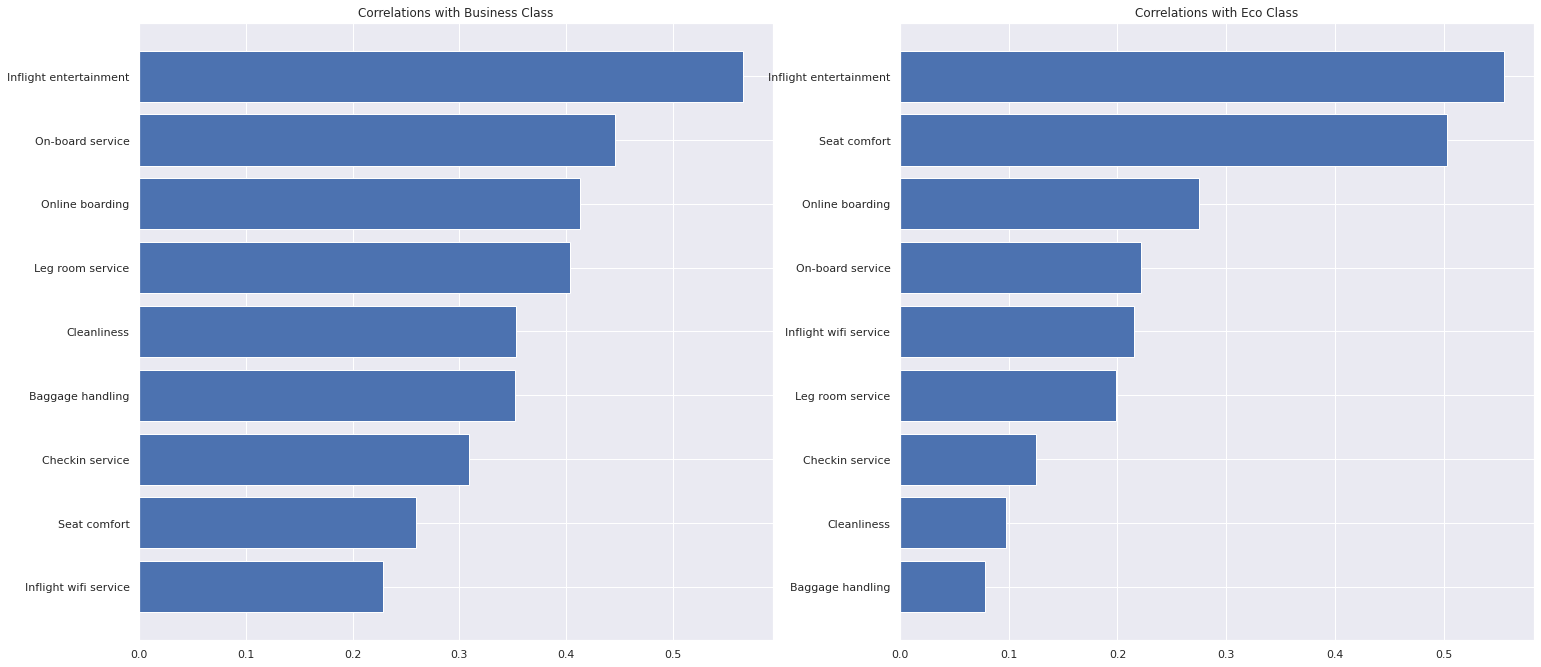

In [ ]:
#4-1 Class.
비지니스 = df5.loc[df5['Class']=='Business']
에코 = df5.loc[df5['Class']=='Eco']
에코플러스 = df5.loc[df5['Class']=='Eco Plus']

plt.figure(figsize=(25,25))

c = 비지니스.corr().iloc[-1]
c = np.abs(c)
c.sort_values(ascending = True, inplace = True)
c = c[:-1]

plt.subplot(2, 2, 1)
plt.barh(c.index, c.values)
plt.title('Correlations with Business Class')

c = 에코.corr().iloc[-1]
c = np.abs(c)
c.sort_values(ascending = True, inplace = True)
c = c[:-1]

plt.subplot(2, 2, 2)
plt.barh(c.index, c.values)
plt.title('Correlations with Eco Class')

plt.show()

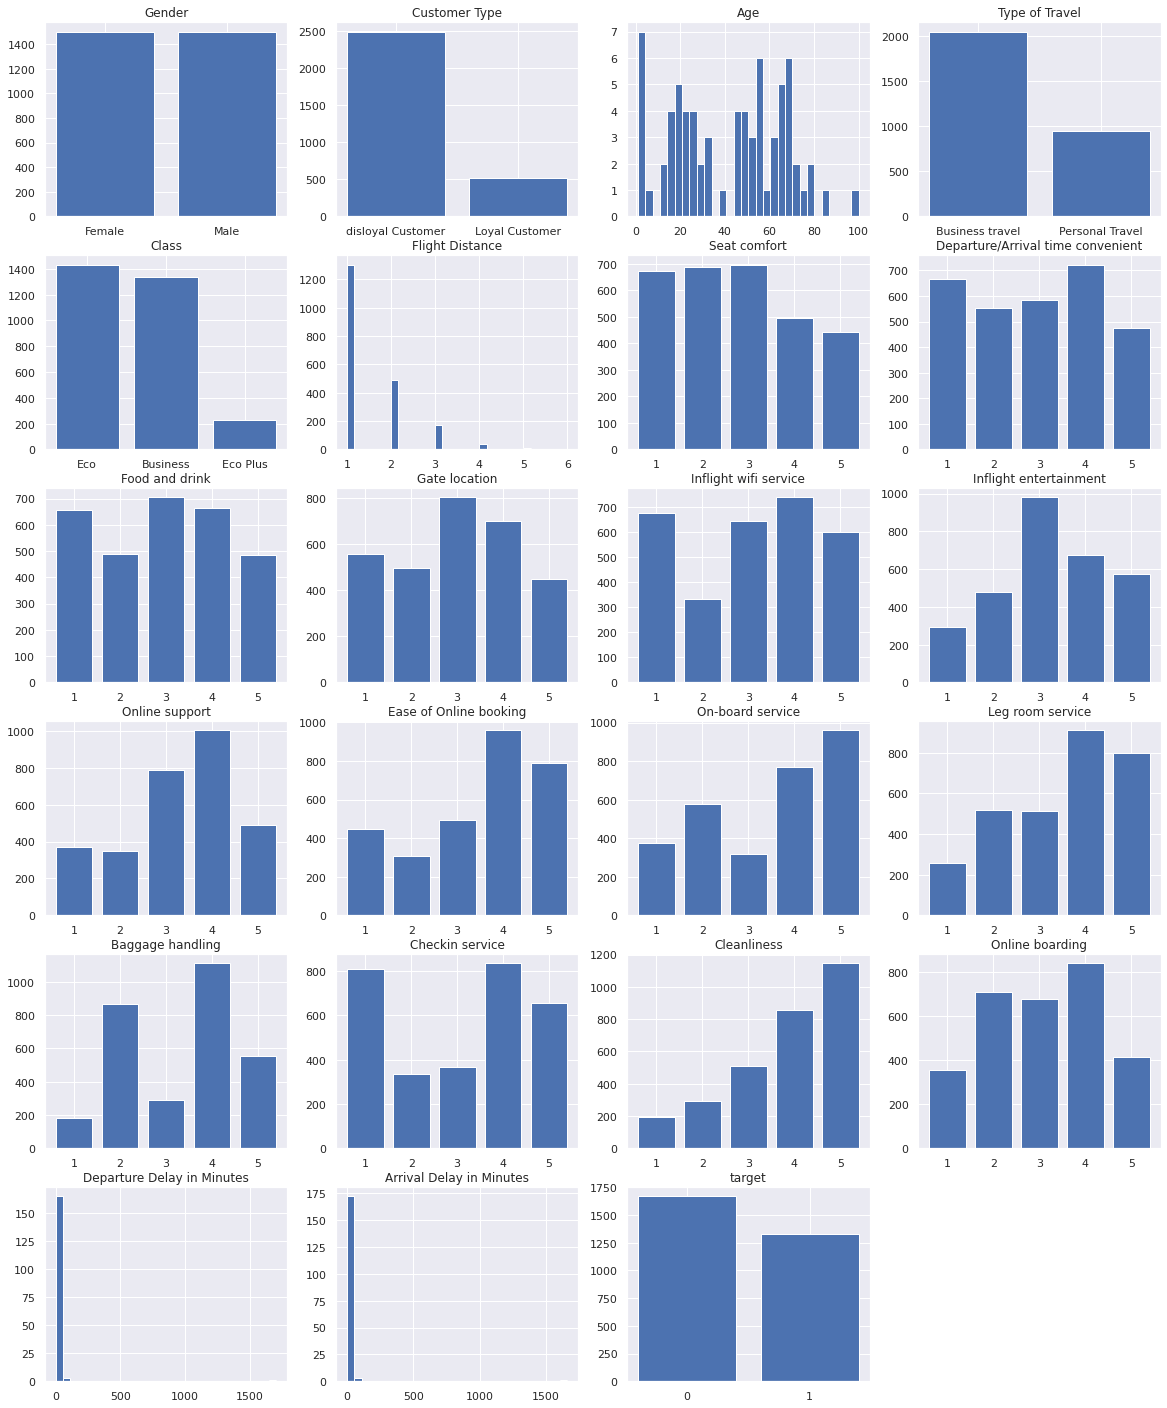

In [ ]:
# 컬럼별 개수 / 바 + 히스토그램
plt.figure(figsize = (20, 25))

for i in range(len(df5.columns)):
  tmp_list = df5.iloc[:, i].unique().tolist()
  tmp_vlist = df5.iloc[:, i].value_counts().tolist()

  if len(tmp_list) < 10 :
    plt.subplot(6, 4, i+1)
    plt.bar(tmp_list, tmp_vlist)
    plt.xticks(tmp_list)
    plt.title(df5.columns[i])
  else:
    plt.subplot(6, 4, i+1)
    plt.hist(tmp_vlist, bins = 30)
    plt.title(df5.columns[i])

plt.show()

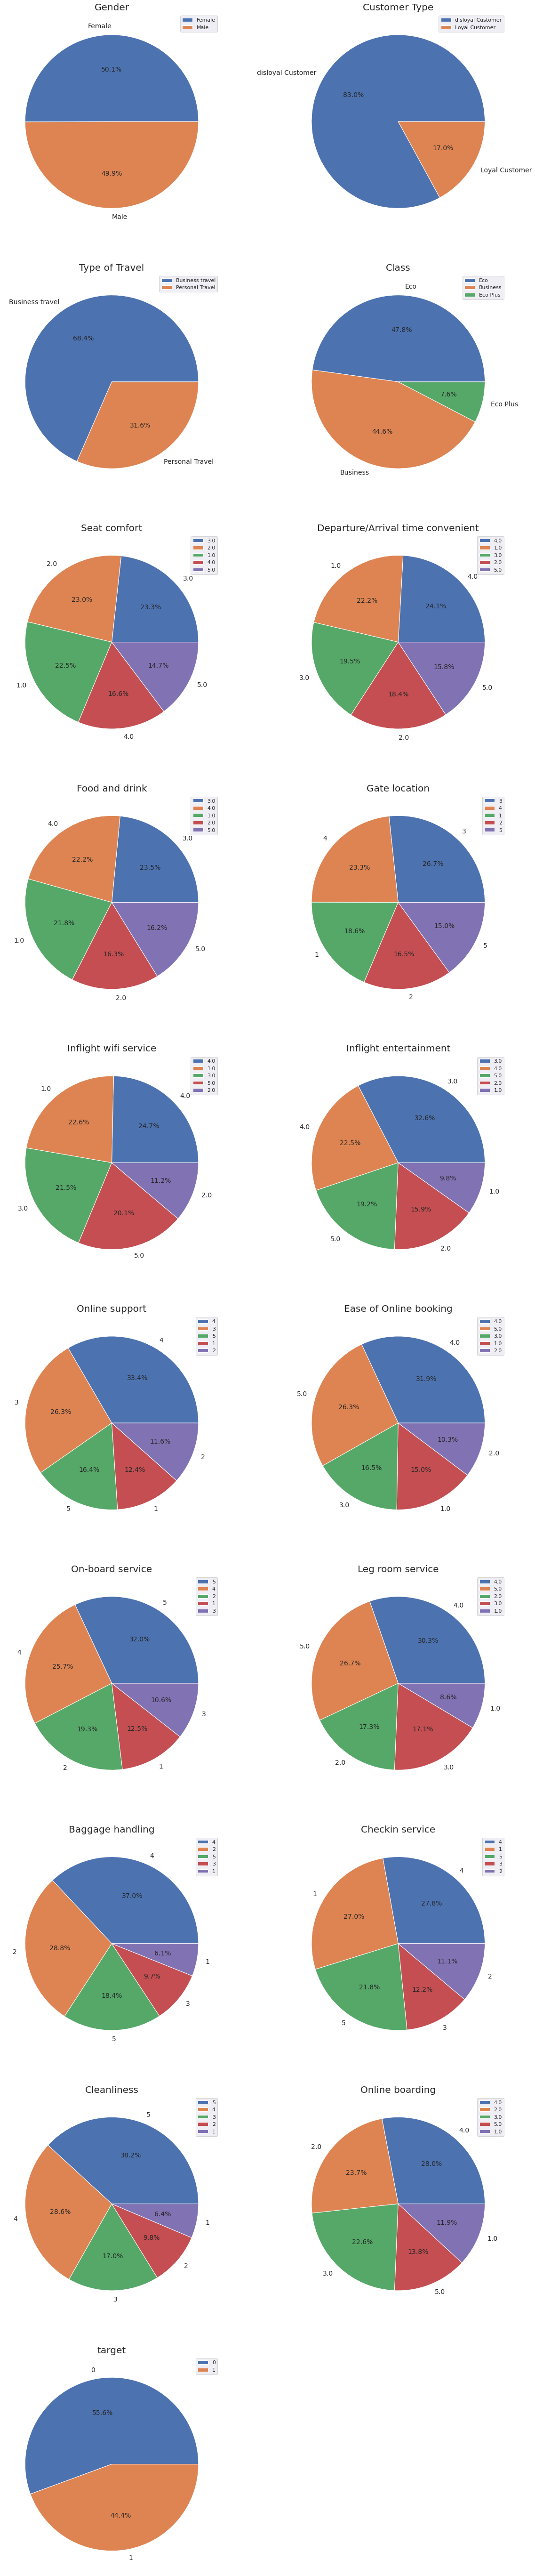

In [ ]:
# 컬럼별 개수 / 파이
plt.figure(figsize = (20, 100))

count = 1
for i in range(23):
  tmp_list = df5.iloc[:, i].unique().tolist()
  tmp_vlist = df5.iloc[:, i].value_counts().tolist()

  if len(tmp_list) < 10 :
    plt.subplot(10, 2, count)
    plt.pie(tmp_vlist, labels = tmp_list, autopct='%.1f%%', textprops={'fontsize': 14})
    plt.title(df5.columns[i], size = 20)
    plt.legend(loc = 'upper right')
    count += 1

plt.show()

In [ ]:
# 컬럼 별 

# 선형 회귀 모델 점수

In [ ]:
high_idx = 0
high_scr = 0
for k in range(100):
  for i in range(22):
    X = df3[train[i].values]
    y = df3.iloc[:, -1]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    regr = LinearRegression()
    regr.fit(X_train, y_train)
    scr = regr.score(X_test, y_test).round(3)

    if scr > high_scr:
      high_scr = scr
      high_idx = i
print('최고 선형 회귀 모델 :', high_idx)
print('점수 :', high_scr)

최고 선형 회귀 모델 : 20
점수 : 0.6


# 파일 출력

테스트 파일 전처리 및 정수화

In [ ]:
data2 = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dacon/001/test.csv")

data2.set_index('id', inplace= True)
data2.loc[data2['Gender'] == 'Female', 'Gender'] = int(0)
data2.loc[data2['Gender'] == 'Male', 'Gender'] = int(1)
data2.loc[data2['Customer Type'] == 'disloyal Customer', 'Customer Type'] = int(0)
data2.loc[data2['Customer Type'] == 'Loyal Customer', 'Customer Type'] = int(1)
data2.loc[data2['Type of Travel'] == 'Business travel', 'Type of Travel'] = int(0)
data2.loc[data2['Type of Travel'] == 'Personal Travel', 'Type of Travel'] = int(1)
data2.loc[data2['Class'] == 'Eco', 'Class'] = int(0)
data2.loc[data2['Class'] == 'Business', 'Class'] = int(1)
data2.loc[data2['Class'] == 'Eco Plus', 'Class'] = int(2)
data2 = data2.astype(int)

In [ ]:
data2.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
id,,,,,,,,,,,,,,,,,,,,,,
1,0,1,61,1,0,2037,1,1,1,1,3,5,5,5,5,5,5,3,5,3,51,58
2,0,0,27,0,1,1846,1,1,1,4,1,1,1,1,3,4,5,4,4,1,0,0
3,0,1,52,0,1,1622,4,4,4,4,4,3,4,5,5,5,5,4,5,3,0,0
4,1,1,54,0,1,3534,4,4,4,4,5,4,5,2,2,2,2,5,2,1,0,0
5,0,1,41,0,0,1471,4,3,3,3,4,4,4,4,3,1,2,5,4,4,0,0


In [ ]:
from numpy.core.fromnumeric import std
count = 0
sum = 0
for i in [5, 20, 21]:
  mid = data2.iloc[:, i].sort_values()[int(len(data2.iloc[:, i])/2)]
  for j in range(2000):
    if abs((data2.iloc[j, i] - data2.iloc[:, i].mean()) / data2.iloc[:, i].std()) > 2:
      data2.iloc[j, i] = mid
    data2.iloc[j, i] = ((data2.iloc[j, i] - data2.iloc[:, i].min()) / (data2.iloc[:, i].max() - data2.iloc[:, i].min()))
    data2.iloc[j, i] = round(data2.iloc[j, i] * 5, 3)
    data2.iloc[j, i] = int(data2.iloc[j, i] * 100)
data2 = data2.astype(int)

In [ ]:
data2.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
id,,,,,,,,,,,,,,,,,,,,,,
1,0,1,61,1,0,152,1,1,1,1,3,5,5,5,5,5,5,3,5,3,56,65
2,0,0,27,0,1,137,1,1,1,4,1,1,1,1,3,4,5,4,4,1,0,0
3,0,1,52,0,1,120,4,4,4,4,4,3,4,5,5,5,5,4,5,3,0,0
4,1,1,54,0,1,267,4,4,4,4,5,4,5,2,2,2,2,5,2,1,0,0
5,0,1,41,0,0,109,4,3,3,3,4,4,4,4,3,1,2,5,4,4,0,0


In [ ]:
for i in range(6, 20):
  if i != 5 or i != 20 or i != 21:
    for j in range(2000):
      if data2.iloc[j][i] == 0:
        data2.iloc[j, i] = int(round(data2.iloc[:, i].mean()))
data2 = data2.astype(int)

In [ ]:
data2.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
id,,,,,,,,,,,,,,,,,,,,,,
1,0,1,61,1,0,152,1,1,1,1,3,5,5,5,5,5,5,3,5,3,56,65
2,0,0,27,0,1,137,1,1,1,4,1,1,1,1,3,4,5,4,4,1,0,0
3,0,1,52,0,1,120,4,4,4,4,4,3,4,5,5,5,5,4,5,3,0,0
4,1,1,54,0,1,267,4,4,4,4,5,4,5,2,2,2,2,5,2,1,0,0
5,0,1,41,0,0,109,4,3,3,3,4,4,4,4,3,1,2,5,4,4,0,0


In [ ]:
df3.to_csv('edited_train.csv', index = True)
data2.to_csv('edited_test.csv', index = True)

# 오렌지 결과 변환

In [ ]:
orange = pd.read_csv('/content/result._ranforest.csv')

orange = orange.iloc[2:, 0:2]
orange.head()

,id,Random Forest
2,1.0,1
3,2.0,0
4,3.0,1
5,4.0,0
6,5.0,1


In [ ]:
for i in range(2000):
  orange.iloc[i, 0] = float(orange.iloc[i, 0])
  orange.iloc[i, 0] = int(orange.iloc[i, 0])
  orange.iloc[i, 1] = float(orange.iloc[i, 1])
  orange.iloc[i, 1] = int(orange.iloc[i, 1])
orange.head(10)

,id,Random Forest
2,1,1
3,2,0
4,3,1
5,4,0
6,5,1
7,6,1
8,7,1
9,8,1
10,9,1
11,10,1


In [ ]:
orange.columns = ['id', 'target']
orange.head(10)

,id,target
2,1,1
3,2,0
4,3,1
5,4,0
6,5,1
7,6,1
8,7,1
9,8,1
10,9,1
11,10,1


In [ ]:
orange.set_index('id').to_csv('result_ranfore_final.csv', index = True)